In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.DataFrame({
    'x1': [12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],
    'x2': [39,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7,24]
})

In [2]:
type(df)

pandas.core.frame.DataFrame

In [3]:
np.random.seed(200)
#Número de centroides k = 3
k = 3
#Inicializamos los centroides a valores aleatorios en el espacio de datos
centroids = {
    i+1: [np.random.randint(0,80), np.random.randint(0,80)] for i in range(k)
}

In [4]:
centroids

{1: [26, 16], 2: [68, 42], 3: [55, 76]}

In [5]:
type(centroids)

dict

<function matplotlib.pyplot.show(close=None, block=None)>

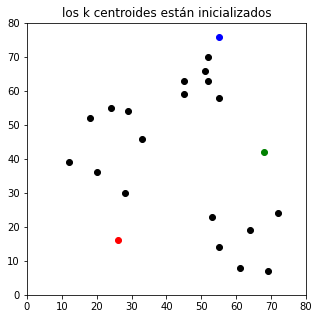

In [6]:
fig = plt.figure(figsize = (5,5))
plt.scatter(df['x1'], df['x2'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
    
plt.title(u'los k centroides están inicializados')
plt.xlim(0,80)
plt.ylim(0,80)
plt.show

In [7]:
def asignacion(df, centroids):
    for i in centroids.keys():
        # sqrt((x1-c1)^2 - (x2-c2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x1'] - centroids[i][0]) ** 2
                + (df['x2'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df


In [8]:
df = asignacion(df, centroids)

In [9]:
df

,x1,x2,distance_from_1,distance_from_2,distance_from_3,closest,color
0,12,39,26.925824,56.080300,56.727418,1,r
1,20,36,20.880613,48.373546,53.150729,1,r
2,28,30,14.142136,41.761226,53.338541,1,r
3,18,52,36.878178,50.990195,44.102154,1,r
4,29,54,38.118237,40.804412,34.058773,3,b
5,33,46,30.805844,35.227830,37.202150,1,r
6,24,55,39.051248,45.880279,37.443290,3,b
7,45,59,47.010637,28.600699,19.723083,3,b
8,45,63,50.695167,31.144823,16.401219,3,b
9,52,70,59.933296,32.249031,6.708204,3,b


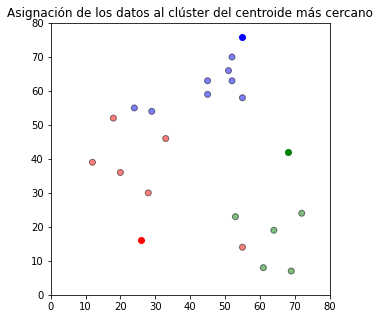

In [10]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x1'], df['x2'], color=df['color'], alpha=0.5, edgecolor = 'k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.title(u'Asignación de los datos al clúster del centroide más cercano')
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

In [11]:
import copy 
old_centroids = copy.deepcopy(centroids)
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i] ['x1'])
        centroids[i][1] = np.mean(df[df['closest'] == i] ['x2'])
    return k

In [12]:
centroids = update(centroids)

In [13]:
centroids

{1: [27.666666666666668, 36.166666666666664],
 2: [63.8, 16.2],
 3: [44.125, 61.0]}

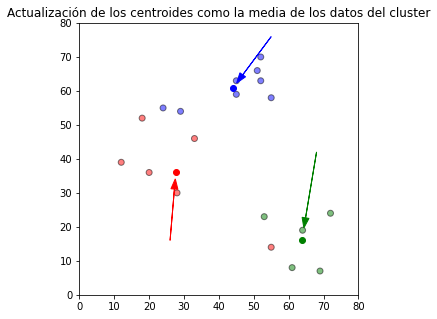

In [14]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(df['x1'],df['x2'], color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.title(u'Actualización de los centroides como la media de los datos del cluster')
plt.xlim(0,80)
plt.ylim(0,80)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

In [15]:
df = asignacion(df, centroids)

In [16]:
df

,x1,x2,distance_from_1,distance_from_2,distance_from_3,closest,color
0,12,39,15.920811,56.595760,38.936045,1,r
1,20,36,7.668478,48.067453,34.742130,1,r
2,28,30,6.175669,38.367695,34.943034,1,r
3,18,52,18.550981,58.131575,27.631786,1,r
4,29,54,17.883108,51.379763,16.666302,3,b
5,33,46,11.186549,42.856505,18.675268,1,r
6,24,55,19.186946,55.583091,21.000372,1,r
7,45,59,28.667151,46.746979,2.183031,3,b
8,45,63,31.944831,50.434909,2.183031,3,b
9,52,70,41.674999,55.078853,11.958914,3,b


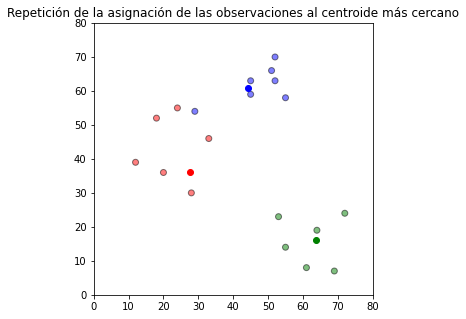

In [17]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x1'],df['x2'], color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.title(u'Repetición de la asignación de las observaciones al centroide más cercano')
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

In [18]:
centroids = update(centroids)

In [19]:
centroids

{1: [22.5, 43.0],
 2: [62.333333333333336, 15.833333333333334],
 3: [47.0, 61.857142857142854]}

In [20]:
df = asignacion(df,centroids)

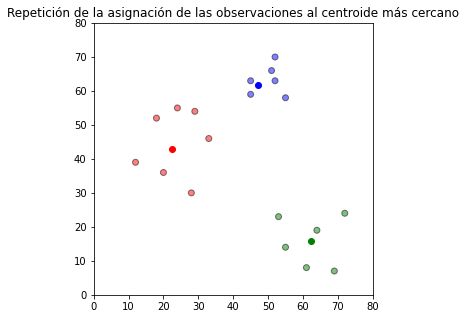

In [21]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x1'],df['x2'], color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.title(u'Repetición de la asignación de las observaciones al centroide más cercano')
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

In [22]:
X = df[['x1','x2']]

In [23]:
X

,x1,x2
0,12,39
1,20,36
2,28,30
3,18,52
4,29,54
5,33,46
6,24,55
7,45,59
8,45,63
9,52,70


In [24]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_coefficients = []
for i in range(2,11):
    km = KMeans(n_clusters = i, random_state=42)
    km.fit_predict(X)
    score = silhouette_score(X, km.labels_, metric='euclidean')
    print('Número de clusters ',i,'Silhouette Score: %.3f' % score)
    silhouette_coefficients.append(score)

Número de clusters  2 Silhouette Score: 0.572
Número de clusters  3 Silhouette Score: 0.640
Número de clusters  4 Silhouette Score: 0.599
Número de clusters  5 Silhouette Score: 0.438
Número de clusters  6 Silhouette Score: 0.495
Número de clusters  7 Silhouette Score: 0.434
Número de clusters  8 Silhouette Score: 0.374
Número de clusters  9 Silhouette Score: 0.317
Número de clusters  10 Silhouette Score: 0.228


<function matplotlib.pyplot.show(close=None, block=None)>

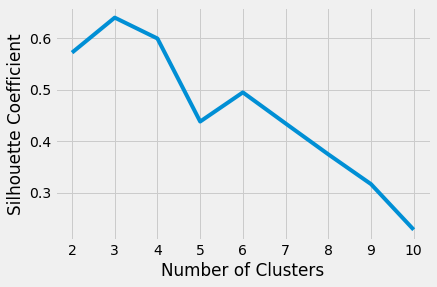

In [25]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show